In [5]:
#For creating variables

#location

using Plots

L = zeros(23,2)
z = 0
for i = 1:5
    for j = 1:5
        z = z+1
        if (z <= 23)
            L[z,1] = i*100
            L[z,2] = j*100
        end
    end
end
println(L)

#Distance Method
function Dist(x1,x2,P)
    return sqrt( (P[x2,1]-P[x1,1])^2 + (P[x2,2]-P[x1,2])^2 )
end



[100.0 100.0; 100.0 200.0; 100.0 300.0; 100.0 400.0; 100.0 500.0; 200.0 100.0; 200.0 200.0; 200.0 300.0; 200.0 400.0; 200.0 500.0; 300.0 100.0; 300.0 200.0; 300.0 300.0; 300.0 400.0; 300.0 500.0; 400.0 100.0; 400.0 200.0; 400.0 300.0; 400.0 400.0; 400.0 500.0; 500.0 100.0; 500.0 200.0; 500.0 300.0]


Dist (generic function with 1 method)

In [6]:
#Defining the paramters
#It is will be in a certain order of 
# (Tanker truck, tube trailer, Tank railcarm, and tube rail car) for the four value ones 
#remember to include the units in the paper

#Define all the variable

av = [18 18 12 12] #availability of transport model l

#consider boil off losses from transport(notes)

cc = [500000 250000 500000 300000]
#not sure what value I should be using (ask yen-an about this)

cud = [0.0976 0.0976 0.0621 0.0621]

#D_tot  #Can be exported from excel document

#distance: I can manually calculate that from location

dsat = 0.3  # This is something I can try to vary to see its effects on the solution space

fuelp = [1.16 1.16 0.28 0.28] 

ge = 365*[8.22 8.22; 6.85 6.85]

ir = 0.1

lutime = [2 2 12 12]

UPC = 480000

LPC= 10000

UQC = 960000

LQC = [4082 181 9072 454]

USC = 540000

LSC = 10000

speed = 365*[55 55 45 45]

tcap = [4082 181 9072 454]

UB = [20 250 50]

#(steam reformation, coal gasification, biomass gasification)(LH2, CH2)
#Dependent on the current amount in the grid at the certian time period
upc = [1.53 0.94 1.71 1.06 3.08 1.71]

usc = 365*[0.005 0.076]

tau = [0.1 0.9 0.25]

wage = 365*8*[54 54 44 44]; # 8 hours a day

theta = 1/365  #day

#Damage factor equal for all sources why not









0.0027397260273972603

In [2]:
#importing the data
using DataFrames, CSV, JuMP, GAMS, Gurobi
data1 = CSV.read("Optimization_data.csv", DataFrame)  #Grid values
data2 = CSV.read("%_and_max.csv", DataFrame)         #Desired min percent, and max values
data3 = CSV.read("alpha.csv", DataFrame)             #Alpha  values
data4 = CSV.read("Beta.csv", DataFrame)              #Beta  values
#data4 = CSV.read("Environ_imp.csv", DataFrame)       #Environmenal Impact
                                                      

#going to add the %5 percent annual(Doing 2 time periods)
Dem = Array(data1[1:23,2:3])

#You can just manually enter in the values
    #got ir
    #need tau, and 

α = Array(data3[1:6, 1:5])
β = Array(data4[1:6, 1:5])

#αPL[g,p,t]

αPL = zeros(23,6)
#there is also CH2 as well
#LH2, CH2 Values, there are 6 type of plants(in terms of what produces what)

αPL[:,1] .= 42200000 
αPL[:,2] .= 29900000
αPL[:,3] .= 75500000
αPL[:,4] .= 60800000 
αPL[:,5] .= 111000000
αPL[:,6] .= 71500000




αST = zeros(23,2)

αST[:,1] .= 9.05*10^6
αST[:,2] .= 1.4*10^8

#αST[:,1,2] .= 1.05*αST[:,1,1]
#αST[:,2,2] .= 1.05*αST[:,2,1]

βPL = zeros(23,6)

β

βPL[:,1] .= 2.81
βPL[:,2] .= 1.99
βPL[:,3] .= 5.04
βPL[:,4] .= 4.05
βPL[:,5] .= 7.42
βPL[:,6] .= 4.77

#βPL[:,1,2] .= 1.05*βPL[:,1,1] 
#βPL[:,2,2] .= 1.05*βPL[:,2,1]
#βPL[:,3,2] .= 1.05*βPL[:,3,1]
#βPL[:,4,2] .= 1.05*βPL[:,4,1]
#βPL[:,5,2] .= 1.05*βPL[:,5,1]
#βPL[:,6,2] .= 1.05*βPL[:,6,1]

βST = zeros(23,2)

βST[:,1] .= 209.17
βST[:,2] .= 3247.25

#βST[:,1,2] .= 1.05*βST[:,1,1]
#βST[:,2,2] .= 1.05*βST[:,2,1]
    
ωPR = [3.34*10^-6; 6.07*10^-5; -2.58*10^-5; 3.34*10^-6; 6.07*10^-5; -2.58*10^-5]
ωST = [1.44*10^-7; 1.44*10^-7; 1.44*10^-7; 3.2*10^-8; 3.2*10^-8; 3.2*10^-8]
ωTR = [3.49 * 10*-8; 7.77*10^-8; 7.85*10^-9;1.2*10^-8]

d = Array(data1[1:23,2])



#importing the package that will be used in the analysis
#I need to split up the data being impimentented, so I need to create multiple files of useful information




  

#Questions to ask?
#would would be the effects of a bimodal distribution versus a bell curve for solution, 
#for hydrogen demand

#How does varying the amount that workers get paid vary the results?
#

23-element Vector{Int64}:
   510
   400
   790
  1195
   650
   900
  2005
  1925
  3220
  4510
   715
  2565
  4985
  2485
  3435
  5235
  4305
  1985
  2285
  5320
 15255
  1040
  1260

In [7]:
#min solution from other
function SCO(g,l,p,s,i)
    
    #Generic sets of variables
    T = 2 #two time periods
    GG = g
    G = size(g,1)  #Grid Zones (23 zones)
    L = length(l)  #transportation technologies (4 types)
    P = length(p)  #Plant technologies (3 types for 2 types)
    S = length(s)  #Storage technologies (2 types)
    I = length(i)  #hydrogen form (2 types)
    
    model = Model(Gurobi.Optimizer)
    #all the given values for demand, and such increase by 5% each time period
     @variables(model, begin
        CPL[g = 1:G, p = 1:P] >= 0                #Capacity of manufacturing technology
        CST[g = 1:G, s = 1:S] >= 0                #Capacity of storage technology s in grid g in period t
        CEPL[g = 1:G, p = 1:P] >= 0               #Capacity expansion of manufacturing technology
        CEST[g = 1:G, s = 1:S] >= 0               #Capacity  expansion of storage technology s in grid g in period t
        D[i = 1:I, g = 1:G] >= 0                  #amount of hydrogen for i distributed in grid g in period t
        DAM >= 0                                  #Damage in human health due to climate change
        FC >= 0                                   #fuel costs
        FCC >= 0                         #Facility capital costs in period t            
        FOC >= 0                         #Facility operacting costs in time t
        GC  >= 0                          #general costs in period t
        LC  >= 0                          #labor costs in period t
        LCI >= 0                                   #Life cycle emmsions of chemcial B
        MC  >= 0                          #maaintenance costs in period t
        NPL[g = 1:G, p = 1:P] >= 0                 #Number of plants type p installed in grid g in time period t
        NST[g = 1:G, s = 1:S] >= 0                       #Number of storage technologies p installed in grid g in time period t
        NTR[l = 1:L] >= 0                          #Number of transportation units type l purchaced in period t
        PR[i = 1:I, g = 1:G, p = 1:P] >= 0          #Production of hydrogen mode i via technology p in period t in grid g
        Q[i = 1:I, g = 1:G, gp = 1:G, p = 1:P] >= 0 #flow of hydrogen mode i via transformation mode l between grids g and g' in period t
        S1[i = 1:I, g = 1:G, s = 1:S] >= 0           #amount of hydrogen in physical form i stored via tech s in grid g in period t
        TC  >= 0                                    #total amount of money spent in period t   
        TCC >= 0                                   #total transportation capitcal cost in period t
        TDC >= 0                                            #total discounted price
        TMC[l = 1:L] >= 0                          #transportation capital cost of mode l in period t
        TOC  >= 0                                   #transportation operating cost in period t
        X[g = 1:G, gp = 1:G, l = 1:L], Bin         #Binary variable for link between g and g' using technology l(1 if there 0 if not)  
           
    end)
    
            
   @constraints(model, begin
           
        #Mass Balance Constraints
        MB1[i = 1:I , g = 1:G],  sum(PR[i,g,p] for p = 1:P) + sum(sum(Q[i,gp,g,l] for l = 1:L) for gp = 1:G if g != gp) == sum(S1[i, g, s] for s = 1:S ) + D[i,g] + sum(sum(Q[i,g,gp,l] for l = 1:L) for gp = 1:G if g != gp)
        MB2[g = 1:G], sum(D[i,g] for i = 1:I) <= d[g]
        MB3[g = 1:G], d[g]*0.25 <= sum(D[i,g] for i = 1:I)
         
            
        #Plant capacity
        PC1[g = 1:G, p = 1:P], sum(PR[i,g,p] for i = 1:I) <= CPL[g,p]
        PC2[g = 1:G, p = 1:P], 0.25*CPL[g,p] <= sum(PR[i,g,p] for i = 1:I)  
        PC3[g = 1:G, p = 1:P], CPL[g,p] == CEPL[g,p] 
        PC4[g = 1:G, p = 1:P], CEPL[g,p] <= 480000*365*NPL[g,p] 
        PC5[g = 1:G, p = 1:P], 10000*365*NPL[g,p] <= CEPL[g,p]
            
        #transportation
        
        TR1[i = 1:I, l =1:L,g = 1:G, gp= 1:G, gp! = g], 181*X[g,gp,l] <= sum(Q[i, g, gp, l] for i in 1:I) 
        TR2[i = 1:I, l =1:L,g = 1:G, gp= 1:G, gp != g], sum(Q[i, g, gp, l] for i in 1:I) <= 365*960000X[g,gp,l] 
       TR3[l =1:L, g = 1:G, gp= 1:G, gp! = g], (X[g,gp,l]) + (X[gp,g,l] ) <= 1

              
        #Storage capacity
        SC1[g = 1:G, s = 1:S], sum(S1[i,g,s] for i in 1:2) <= CST[g,s]
        SC2[i = 1:I ,g = 1:G], 2*((1/365)*D[i,g]) <= sum(CST[g,s] for s in 1:S)
        SC3[g = 1:G, s = 1:S], CST[g,s] == CEST[g,s]
        SC4[g = 1:G, s = 1:S], 10000*365*NST[g,s] <= CEST[g,s] 
        SC5[g = 1:G, s = 1:S], CEST[g,s] <= 540000*365*NST[g,s]
         
        #Costs 
        C1, TDC == TC
        C2, TC == FCC+ TCC + FOC + TOC 
        C3, FCC == sum(sum(αPL[g,p]*NPL[g,p] + βPL[g,p]*CEPL[g,p] for p = 1:P) for g = 1:G )  + sum(sum(αST[g,s]*NST[g,s] + βST[g,s]*CEST[g,s]  for s = 1:S) for g = 1:G) 
        C4, TCC == sum(NTR[l]*cc[l] for l= 1:L)
        C5[l = 1:L], NTR[l] >= sum(sum(sum((Q[i,g,gp,l]/av[l]*tcap[l])*(2*Dist(g,gp,GG)/speed[l] + lutime[l]) for gp= 1:G if gp != g) for g= 1:G) for i=1:I)
        
        C6,  FOC == sum(sum(sum(upc[p]*PR[i,g,p] for p = 1:P)  for g = 1:G) for i = 1:I) + sum(sum(sum(usc[i]*D[i,g]*(1/365)  for s = 1:S) for g = 1:G) for i =1:I)
        C7,  TOC == FC + LC + MC + GC 
        C8,  LC == sum(sum(sum(sum(wage[l]*(Q[i,g,gp,l]/tcap[l])*(2*Dist(g,gp,GG)/speed[l] + lutime[l]) for l = 1:L) for gp = 1:G if gp != g) for g = 1:G) for i = 1:I)
        C9,  MC == sum(sum(sum(sum(cud[l]*(Q[i,g,gp,l]/tcap[l])*(2*Dist(g,gp,GG)) for l = 1:L) for gp = 1:G if gp != g) for g = 1:G) for i = 1:I)
        C10, GC == sum(ge[l]*NTR[l]  for l = 1:L)
        C11, FC == sum(sum(sum(sum(fuelp[l]*(Q[i,g,gp,l]/tcap[l]*tcap[l])*(2*Dist(g,gp,GG)) for l = 1:L) for gp = 1:G if gp != g) for g = 1:G) for i = 1:I)
               
        #LCA 
        #This can be simplified since there is only 1 chemical source
        
        D1, DAM ==  sum(sum(sum(PR[i,g,p]*(ωPR[p] + ωST[i]) for p = 1:P)  for g = 1:G ) for i = 1:I) + sum(sum(sum(sum(Q[i,g,gp,l]*(Dist(g,gp,GG)*ωTR[l]) for l =1:L) for gp = 1:G if g != gp)  for g = 1:G ) for i = 1:I)
        
        
        #Others
        O1[g = 1:G, p = 1:P], NPL[g,p] <= 20
        O2[g = 1:G, s = 1:S], NST[g,s] <= 250
        O3[l = 1:L], NTR[l] <= 50
        
            end)
    
    @objective(model, Min, TDC)
    optimize!(model)
    println(value.(NPL))
    println(value.(NST))
end

g = L
#l = ["LHTT","LHRTC","CHTT","CHRTC"]
l = rand(4)
#p = ["SMR", "CG", "BG"]
p = rand(6)
#s = ["LS", "GS"]
s = rand(2)
#i = ["Liquid", "Gas"]
i = rand(2)
SCO(g,l,p,s,i)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-13
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 11795 rows, 9450 columns and 61768 nonzeros
Model fingerprint: 0xfcd0ad50
Variable types: 7334 continuous, 2116 integer (2116 binary)
Coefficient statistics:
  Matrix range     [8e-07, 4e+08]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+04]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 11472 rows and 8852 columns
Presolve time: 0.04s
Presolved: 323 rows, 598 columns, 1472 nonzeros
Variable types: 598 continuous, 0 integer (0 binary)

Root relaxation: objective 6.287038e+04, 330 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Dep

In [8]:
#For Getting the min solution for environmental impact values of epsilon

function SCO_min(g,l,p,s,i)
    
     #Generic sets of variables
    T = 2 #two time periods
    GG = g
    G = size(g,1)  #Grid Zones (23 zones)
    L = length(l)  #transportation technologies (4 types)
    P = length(p)  #Plant technologies (3 types for 2 types)
    S = length(s)  #Storage technologies (2 types)
    I = length(i)  #hydrogen form (2 types)
    
    model = Model(Gurobi.Optimizer)
    #all the given values for demand, and such increase by 5% each time period
     @variables(model, begin
        CPL[g = 1:G, p = 1:P] >= 0                #Capacity of manufacturing technology
        CST[g = 1:G, s = 1:S] >= 0                #Capacity of storage technology s in grid g in period t
        CEPL[g = 1:G, p = 1:P] >= 0               #Capacity expansion of manufacturing technology
        CEST[g = 1:G, s = 1:S] >= 0               #Capacity  expansion of storage technology s in grid g in period t
        D[i = 1:I, g = 1:G] >= 0                  #amount of hydrogen for i distributed in grid g in period t
        DAM >= 0                                  #Damage in human health due to climate change
        FC >= 0                                   #fuel costs
        FCC >= 0                         #Facility capital costs in period t            
        FOC >= 0                         #Facility operacting costs in time t
        GC  >= 0                          #general costs in period t
        LC  >= 0                          #labor costs in period t
        LCI >= 0                                   #Life cycle emmsions of chemcial B
        MC  >= 0                          #maaintenance costs in period t
        NPL[g = 1:G, p = 1:P] >= 0                 #Number of plants type p installed in grid g in time period t
        NST[g = 1:G, s = 1:S] >= 0                       #Number of storage technologies p installed in grid g in time period t
        NTR[l = 1:L] >= 0                          #Number of transportation units type l purchaced in period t
        PR[i = 1:I, g = 1:G, p = 1:P] >= 0          #Production of hydrogen mode i via technology p in period t in grid g
        Q[i = 1:I, g = 1:G, gp = 1:G, p = 1:P] >= 0 #flow of hydrogen mode i via transformation mode l between grids g and g' in period t
        S1[i = 1:I, g = 1:G, s = 1:S] >= 0           #amount of hydrogen in physical form i stored via tech s in grid g in period t
        TC  >= 0                                    #total amount of money spent in period t   
        TCC >= 0                                   #total transportation capitcal cost in period t
        TDC >= 0                                            #total discounted price
        TMC[l = 1:L] >= 0                          #transportation capital cost of mode l in period t
        TOC  >= 0                                   #transportation operating cost in period t
        X[g = 1:G, gp = 1:G, l = 1:L], Bin         #Binary variable for link between g and g' using technology l(1 if there 0 if not)  
           
    end)
    
            
   @constraints(model, begin
           
        #Mass Balance Constraints
        MB1[i = 1:I , g = 1:G],  sum(PR[i,g,p] for p = 1:P) + sum(sum(Q[i,gp,g,l] for l = 1:L) for gp = 1:G if g != gp) == sum(S1[i, g, s] for s = 1:S ) + D[i,g] + sum(sum(Q[i,g,gp,l] for l = 1:L) for gp = 1:G if g != gp)
        MB2[g = 1:G], sum(D[i,g] for i = 1:I) <= d[g]
        MB3[g = 1:G], d[g]*0.25 <= sum(D[i,g] for i = 1:I)
         
            
        #Plant capacity
        PC1[g = 1:G, p = 1:P], sum(PR[i,g,p] for i = 1:I) <= CPL[g,p]
        PC2[g = 1:G, p = 1:P], 0.25*CPL[g,p] <= sum(PR[i,g,p] for i = 1:I)  
        PC3[g = 1:G, p = 1:P], CPL[g,p] == CEPL[g,p] 
        PC4[g = 1:G, p = 1:P], CEPL[g,p] <= 480000*365*NPL[g,p] 
        PC5[g = 1:G, p = 1:P], 10000*365*NPL[g,p] <= CEPL[g,p]
            
        #transportation
        
        TR1[i = 1:I, l =1:L,g = 1:G, gp= 1:G, gp! = g], 181*X[g,gp,l] <= sum(Q[i, g, gp, l] for i in 1:I) 
        TR2[i = 1:I, l =1:L,g = 1:G, gp= 1:G, gp != g], sum(Q[i, g, gp, l] for i in 1:I) <= 365*960000X[g,gp,l] 
       TR3[l =1:L, g = 1:G, gp= 1:G, gp! = g], (X[g,gp,l]) + (X[gp,g,l] ) <= 1

              
        #Storage capacity
        SC1[g = 1:G, s = 1:S], sum(S1[i,g,s] for i in 1:2) <= CST[g,s]
        SC2[i = 1:I ,g = 1:G], 2*((1/365)*D[i,g]) <= sum(CST[g,s] for s in 1:S)
        SC3[g = 1:G, s = 1:S], CST[g,s] == CEST[g,s]
        SC4[g = 1:G, s = 1:S], 10000*365*NST[g,s] <= CEST[g,s] 
        SC5[g = 1:G, s = 1:S], CEST[g,s] <= 540000*365*NST[g,s]
         
        #Costs 
        C1, TDC == TC
        C2, TC == FCC+ TCC + FOC + TOC 
        C3, FCC == sum(sum(αPL[g,p]*NPL[g,p] + βPL[g,p]*CEPL[g,p] for p = 1:P) for g = 1:G )  + sum(sum(αST[g,s]*NST[g,s] + βST[g,s]*CEST[g,s]  for s = 1:S) for g = 1:G) 
        C4, TCC == sum(NTR[l]*cc[l] for l= 1:L)
        C5[l = 1:L], NTR[l] >= sum(sum(sum((Q[i,g,gp,l]/av[l]*tcap[l])*(2*Dist(g,gp,GG)/speed[l] + lutime[l]) for gp= 1:G if gp != g) for g= 1:G) for i=1:I)
        
        C6,  FOC == sum(sum(sum(upc[p]*PR[i,g,p] for p = 1:P)  for g = 1:G) for i = 1:I) + sum(sum(sum(usc[i]*D[i,g]*(1/365)  for s = 1:S) for g = 1:G) for i =1:I)
        C7,  TOC == FC + LC + MC + GC 
        C8,  LC == sum(sum(sum(sum(wage[l]*(Q[i,g,gp,l]/tcap[l])*(2*Dist(g,gp,GG)/speed[l] + lutime[l]) for l = 1:L) for gp = 1:G if gp != g) for g = 1:G) for i = 1:I)
        C9,  MC == sum(sum(sum(sum(cud[l]*(Q[i,g,gp,l]/tcap[l])*(2*Dist(g,gp,GG)) for l = 1:L) for gp = 1:G if gp != g) for g = 1:G) for i = 1:I)
        C10, GC == sum(ge[l]*NTR[l]  for l = 1:L)
        C11, FC == sum(sum(sum(sum(fuelp[l]*(Q[i,g,gp,l]/tcap[l]*tcap[l])*(2*Dist(g,gp,GG)) for l = 1:L) for gp = 1:G if gp != g) for g = 1:G) for i = 1:I)
               
        #LCA 
        #This can be simplified since there is only 1 chemical source
        
        D1, DAM ==  sum(sum(sum(PR[i,g,p]*(ωPR[p] + ωST[i]) for p = 1:P)  for g = 1:G ) for i = 1:I) + sum(sum(sum(sum(Q[i,g,gp,l]*(Dist(g,gp,GG)*ωTR[l]) for l =1:L) for gp = 1:G if g != gp)  for g = 1:G ) for i = 1:I)
        
        
        #Others
        O1[g = 1:G, p = 1:P], NPL[g,p] <= 20
        O2[g = 1:G, s = 1:S], NST[g,s] <= 250
        O3[l = 1:L], NTR[l] <= 50
        O4[l = 1:L], NTR[l] >= 10
        
            end)
    
    @objective(model, Min, DAM)
    optimize!(model)
end
   

g = L
#l = ["LHTT","LHRTC","CHTT","CHRTC"]
l = rand(4)
#p = ["SMR", "CG", "BG"]
p = rand(6)
#s = ["LS", "GS"]
s = rand(2)
#i = ["Liquid", "Gas"]
i = rand(2)
SCO_min(g,l,p,s,i)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-13
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 11799 rows, 9450 columns and 61772 nonzeros
Model fingerprint: 0x05814eda
Variable types: 7334 continuous, 2116 integer (2116 binary)
Coefficient statistics:
  Matrix range     [8e-07, 4e+08]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+04]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 11775 rows and 9380 columns
Presolve time: 0.01s
Presolved: 24 rows, 70 columns, 139 nonzeros
Variable types: 70 continuous, 0 integer (0 binary)

Root relaxation: objective 0.000000e+00, 25 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth In

In [9]:
#setting up upper bound and lower bound epsilon values
#upper bound solution
#For Getting the min solution for environmental impact values of epsilon

function SCO_lower(g,l,p,s,i)
    
    #Generic sets of variables
    T = 2 #two time periods
    GG = g
    G = size(g,1)  #Grid Zones (23 zones)
    L = length(l)  #transportation technologies (4 types)
    P = length(p)  #Plant technologies (3 types for 2 types)
    S = length(s)  #Storage technologies (2 types)
    I = length(i)  #hydrogen form (2 types)
    
    model = Model(Gurobi.Optimizer)
    #all the given values for demand, and such increase by 5% each time period
     @variables(model, begin
        CPL[g = 1:G, p = 1:P] >= 0                #Capacity of manufacturing technology
        CST[g = 1:G, s = 1:S] >= 0                #Capacity of storage technology s in grid g in period t
        CEPL[g = 1:G, p = 1:P] >= 0               #Capacity expansion of manufacturing technology
        CEST[g = 1:G, s = 1:S] >= 0               #Capacity  expansion of storage technology s in grid g in period t
        D[i = 1:I, g = 1:G] >= 0                  #amount of hydrogen for i distributed in grid g in period t
        DAM >= 0                                  #Damage in human health due to climate change
        FC >= 0                                   #fuel costs
        FCC >= 0                         #Facility capital costs in period t            
        FOC >= 0                         #Facility operacting costs in time t
        GC  >= 0                          #general costs in period t
        LC  >= 0                          #labor costs in period t
        LCI >= 0                                   #Life cycle emmsions of chemcial B
        MC  >= 0                          #maaintenance costs in period t
        NPL[g = 1:G, p = 1:P] >= 0                 #Number of plants type p installed in grid g in time period t
        NST[g = 1:G, s = 1:S] >= 0                       #Number of storage technologies p installed in grid g in time period t
        NTR[l = 1:L] >= 0                          #Number of transportation units type l purchaced in period t
        PR[i = 1:I, g = 1:G, p = 1:P] >= 0          #Production of hydrogen mode i via technology p in period t in grid g
        Q[i = 1:I, g = 1:G, gp = 1:G, p = 1:P] >= 0 #flow of hydrogen mode i via transformation mode l between grids g and g' in period t
        S1[i = 1:I, g = 1:G, s = 1:S] >= 0           #amount of hydrogen in physical form i stored via tech s in grid g in period t
        TC  >= 0                                    #total amount of money spent in period t   
        TCC >= 0                                   #total transportation capitcal cost in period t
        TDC >= 0                                            #total discounted price
        TMC[l = 1:L] >= 0                          #transportation capital cost of mode l in period t
        TOC  >= 0                                   #transportation operating cost in period t
        X[g = 1:G, gp = 1:G, l = 1:L], Bin         #Binary variable for link between g and g' using technology l(1 if there 0 if not)  
           
    end)
    
            
   @constraints(model, begin
           
        #Mass Balance Constraints
        MB1[i = 1:I , g = 1:G],  sum(PR[i,g,p] for p = 1:P) + sum(sum(Q[i,gp,g,l] for l = 1:L) for gp = 1:G if g != gp) == sum(S1[i, g, s] for s = 1:S ) + D[i,g] + sum(sum(Q[i,g,gp,l] for l = 1:L) for gp = 1:G if g != gp)
        MB2[g = 1:G], sum(D[i,g] for i = 1:I) <= d[g]
        MB3[g = 1:G], d[g]*0.25 <= sum(D[i,g] for i = 1:I)
         
            
        #Plant capacity
        PC1[g = 1:G, p = 1:P], sum(PR[i,g,p] for i = 1:I) <= CPL[g,p]
        PC2[g = 1:G, p = 1:P], 0.25*CPL[g,p] <= sum(PR[i,g,p] for i = 1:I)  
        PC3[g = 1:G, p = 1:P], CPL[g,p] == CEPL[g,p] 
        PC4[g = 1:G, p = 1:P], CEPL[g,p] <= 480000*365*NPL[g,p] 
        PC5[g = 1:G, p = 1:P], 10000*365*NPL[g,p] <= CEPL[g,p]
            
        #transportation
        
        TR1[i = 1:I, l =1:L,g = 1:G, gp= 1:G, gp! = g], 181*365*X[g,gp,l] <= sum(Q[i, g, gp, l] for i in 1:I) 
        TR2[i = 1:I, l =1:L,g = 1:G, gp= 1:G, gp != g], sum(Q[i, g, gp, l] for i in 1:I) <= 365*960000X[g,gp,l] 
       TR3[l =1:L, g = 1:G, gp= 1:G, gp! = g], (X[g,gp,l]) + (X[gp,g,l] ) <= 1

              
        #Storage capacity
        SC1[g = 1:G, s = 1:S], sum(S1[i,g,s] for i in 1:2) <= CST[g,s]
        SC2[i = 1:I ,g = 1:G], 2*((1/365)*D[i,g]) <= sum(CST[g,s] for s in 1:S)
        SC3[g = 1:G, s = 1:S], CST[g,s] == CEST[g,s]
        SC4[g = 1:G, s = 1:S], 10000*365*NST[g,s] <= CEST[g,s] 
        SC5[g = 1:G, s = 1:S], CEST[g,s] <= 540000*365*NST[g,s]
         
        #Costs 
        C1, TDC == TC
        C2, TC == FCC+ TCC + FOC + TOC 
        C3, FCC == sum(sum(αPL[g,p]*NPL[g,p] + βPL[g,p]*CEPL[g,p] for p = 1:P) for g = 1:G )  + sum(sum(αST[g,s]*NST[g,s] + βST[g,s]*CEST[g,s]  for s = 1:S) for g = 1:G) 
        C4, TCC == sum(NTR[l]*cc[l] for l= 1:L)
        C5[l = 1:L], NTR[l] >= sum(sum(sum((Q[i,g,gp,l]/av[l]*tcap[l])*(2*Dist(g,gp,GG)/speed[l] + lutime[l]) for gp= 1:G if gp != g) for g= 1:G) for i=1:I)
        
        C6,  FOC == sum(sum(sum(upc[p]*PR[i,g,p] for p = 1:P)  for g = 1:G) for i = 1:I) + sum(sum(sum(usc[i]*D[i,g]*(1/365)  for s = 1:S) for g = 1:G) for i =1:I)
        C7,  TOC == FC + LC + MC + GC 
        C8,  LC == sum(sum(sum(sum(wage[l]*(Q[i,g,gp,l]/tcap[l])*(2*Dist(g,gp,GG)/speed[l] + lutime[l]) for l = 1:L) for gp = 1:G if gp != g) for g = 1:G) for i = 1:I)
        C9,  MC == sum(sum(sum(sum(cud[l]*(Q[i,g,gp,l]/tcap[l])*(2*Dist(g,gp,GG)) for l = 1:L) for gp = 1:G if gp != g) for g = 1:G) for i = 1:I)
        C10, GC == sum(ge[l]*NTR[l]  for l = 1:L)
        C11, FC == sum(sum(sum(sum(fuelp[l]*(Q[i,g,gp,l]/tcap[l]*tcap[l])*(2*Dist(g,gp,GG)) for l = 1:L) for gp = 1:G if gp != g) for g = 1:G) for i = 1:I)
               
        #LCA 
        #This can be simplified since there is only 1 chemical source
        
        D1, DAM ==  sum(sum(sum(PR[i,g,p]*(ωPR[p] + ωST[i]) for p = 1:P)  for g = 1:G ) for i = 1:I) + sum(sum(sum(sum(Q[i,g,gp,l]*(Dist(g,gp,GG)*ωTR[l]) for l =1:L) for gp = 1:G if g != gp)  for g = 1:G ) for i = 1:I)
        
        
        #Others
        O1[g = 1:G, p = 1:P], NPL[g,p] <= 20
        O2[g = 1:G, s = 1:S], NST[g,s] <= 250
        O3[l = 1:L], NTR[l] <= 50
        O4[l = 1:L], NTR[l] >= 10
        
            end)
    @objective(model, Max, DAM)
    optimize!(model)
    
    return objective_value(model)
end
g = L
#l = ["LHTT","LHRTC","CHTT","CHRTC"]
l = rand(4)
#p = ["SMR", "CG", "BG"]
p = rand(6)
#s = ["LS", "GS"]
s = rand(2)
#i = ["Liquid", "Gas"]
i = rand(2)

SCO_lower(g,l,p,s,i)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-13
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 11799 rows, 9450 columns and 61772 nonzeros
Model fingerprint: 0x3d151eaa
Variable types: 7334 continuous, 2116 integer (2116 binary)
Coefficient statistics:
  Matrix range     [8e-07, 4e+08]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+04]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 11799 rows and 9450 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.03 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 1.03686e+07 1.03686e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.036864435200e+07, bes

1.0368644352000024e7

In [10]:
#setting up upper bound and lower bound epsilon values
#upper bound solution
#For Getting the min solution for environmental impact values of epsilon

function SCO_upper(g,l,p,s,i)
    
    #Generic sets of variables
    T = 2 #two time periods
    GG = g
    G = size(g,1)  #Grid Zones (23 zones)
    L = length(l)  #transportation technologies (4 types)
    P = length(p)  #Plant technologies (3 types for 2 types)
    S = length(s)  #Storage technologies (2 types)
    I = length(i)  #hydrogen form (2 types)
    
    model = Model(Gurobi.Optimizer)
    #all the given values for demand, and such increase by 5% each time period
     @variables(model, begin
        CPL[g = 1:G, p = 1:P] >= 0                #Capacity of manufacturing technology
        CST[g = 1:G, s = 1:S] >= 0                #Capacity of storage technology s in grid g in period t
        CEPL[g = 1:G, p = 1:P] >= 0               #Capacity expansion of manufacturing technology
        CEST[g = 1:G, s = 1:S] >= 0               #Capacity  expansion of storage technology s in grid g in period t
        D[i = 1:I, g = 1:G] >= 0                  #amount of hydrogen for i distributed in grid g in period t
        DAM >= 0                                  #Damage in human health due to climate change
        FC >= 0                                   #fuel costs
        FCC >= 0                         #Facility capital costs in period t            
        FOC >= 0                         #Facility operacting costs in time t
        GC  >= 0                          #general costs in period t
        LC  >= 0                          #labor costs in period t
        LCI >= 0                                   #Life cycle emmsions of chemcial B
        MC  >= 0                          #maaintenance costs in period t
        NPL[g = 1:G, p = 1:P] >= 0                 #Number of plants type p installed in grid g in time period t
        NST[g = 1:G, s = 1:S] >= 0                       #Number of storage technologies p installed in grid g in time period t
        NTR[l = 1:L] >= 0                          #Number of transportation units type l purchaced in period t
        PR[i = 1:I, g = 1:G, p = 1:P] >= 0          #Production of hydrogen mode i via technology p in period t in grid g
        Q[i = 1:I, g = 1:G, gp = 1:G, p = 1:P] >= 0 #flow of hydrogen mode i via transformation mode l between grids g and g' in period t
        S1[i = 1:I, g = 1:G, s = 1:S] >= 0           #amount of hydrogen in physical form i stored via tech s in grid g in period t
        TC  >= 0                                    #total amount of money spent in period t   
        TCC >= 0                                   #total transportation capitcal cost in period t
        TDC >= 0                                            #total discounted price
        TMC[l = 1:L] >= 0                          #transportation capital cost of mode l in period t
        TOC  >= 0                                   #transportation operating cost in period t
        X[ g = 1:G, gp = 1:G, l = 1:L], Bin         #Binary variable for link between g and g' using technology l(1 if there 0 if not)  
           
    end)
    
            
  @constraints(model, begin
           
        #Mass Balance Constraints
        MB1[i = 1:I , g = 1:G],  sum(PR[i,g,p] for p = 1:P) + sum(sum(Q[i,gp,g,l] for l = 1:L) for gp = 1:G if g != gp) == sum(S1[i, g, s] for s = 1:S ) + D[i,g] + sum(sum(Q[i,g,gp,l] for l = 1:L) for gp = 1:G if g != gp)
        MB2[g = 1:G], sum(D[i,g] for i = 1:I) <= d[g]
        MB3[g = 1:G], d[g]*0.25 <= sum(D[i,g] for i = 1:I)
         
            
        #Plant capacity
        PC1[g = 1:G, p = 1:P], sum(PR[i,g,p] for i = 1:I) <= CPL[g,p]
        PC2[g = 1:G, p = 1:P], 0.25*CPL[g,p] <= sum(PR[i,g,p] for i = 1:I)  
        PC3[g = 1:G, p = 1:P], CPL[g,p] == CEPL[g,p] 
        PC4[g = 1:G, p = 1:P], CEPL[g,p] <= 480000*365*NPL[g,p] 
        PC5[g = 1:G, p = 1:P], 10000*365*NPL[g,p] <= CEPL[g,p]
            
        #transportation
        
        TR1[i = 1:I, l =1:L,g = 1:G, gp= 1:G, gp != g], 181*X[g,gp,l] <= sum(Q[i, g, gp, l] for i in 1:I) 
        TR2[i = 1:I, l =1:L,g = 1:G, gp= 1:G, gp != g], sum(Q[i, g, gp, l] for i in 1:I) <= 365*960000X[g,gp,l] 
       TR3[l =1:L, g = 1:G, gp= 1:G, gp != g], (X[g,gp,l]) + (X[gp,g,l] ) <= 1

              
        #Storage capacity
        SC1[g = 1:G, s = 1:S], sum(S1[i,g,s] for i in 1:2) <= CST[g,s]
        SC2[i = 1:I ,g = 1:G], 2*((1/365)*D[i,g]) <= sum(CST[g,s] for s in 1:S)
        SC3[g = 1:G, s = 1:S], CST[g,s] == CEST[g,s]
        SC4[g = 1:G, s = 1:S], 10000*365*NST[g,s] <= CEST[g,s] 
        SC5[g = 1:G, s = 1:S], CEST[g,s] <= 540000*365*NST[g,s]
         
        #Costs 
        C1, TDC == TC
        C2, TC == FCC+ TCC + FOC + TOC 
        C3, FCC == sum(sum(αPL[g,p]*NPL[g,p] + βPL[g,p]*CEPL[g,p] for p = 1:P) for g = 1:G )  + sum(sum(αST[g,s]*NST[g,s] + βST[g,s]*CEST[g,s]  for s = 1:S) for g = 1:G) 
        C4, TCC == sum(NTR[l]*cc[l] for l= 1:L)
        C5[l = 1:L], NTR[l] >= sum(sum(sum((Q[i,g,gp,l]/av[l]*tcap[l])*(2*Dist(g,gp,GG)/speed[l] + lutime[l]) for gp= 1:G if gp != g) for g= 1:G) for i=1:I)
        
        C6,  FOC == sum(sum(sum(upc[p]*PR[i,g,p] for p = 1:P)  for g = 1:G) for i = 1:I) + sum(sum(sum(usc[i]*D[i,g]*(1/365)  for s = 1:S) for g = 1:G) for i =1:I)
        C7,  TOC == FC + LC + MC + GC 
        C8,  LC == sum(sum(sum(sum(wage[l]*(Q[i,g,gp,l]/tcap[l])*(2*Dist(g,gp,GG)/speed[l] + lutime[l]) for l = 1:L) for gp = 1:G if gp != g) for g = 1:G) for i = 1:I)
        C9,  MC == sum(sum(sum(sum(cud[l]*(Q[i,g,gp,l]/tcap[l])*(2*Dist(g,gp,GG)) for l = 1:L) for gp = 1:G if gp != g) for g = 1:G) for i = 1:I)
        C10, GC == sum(ge[l]*NTR[l]  for l = 1:L)
        C11, FC == sum(sum(sum(sum(fuelp[l]*(Q[i,g,gp,l]/tcap[l]*tcap[l])*(2*Dist(g,gp,GG)) for l = 1:L) for gp = 1:G if gp != g) for g = 1:G) for i = 1:I)
               
        #LCA 
        #This can be simplified since there is only 1 chemical source
        
        D1, DAM ==  sum(sum(sum(PR[i,g,p]*(ωPR[p] + ωST[i]) for p = 1:P)  for g = 1:G ) for i = 1:I) + sum(sum(sum(sum(Q[i,g,gp,l]*(Dist(g,gp,GG)*ωTR[l]) for l =1:L) for gp = 1:G if g != gp)  for g = 1:G ) for i = 1:I)
        
        
        #Others
        O1[g = 1:G, p = 1:P], NPL[g,p] <= 20
        O2[g = 1:G, s = 1:S], NST[g,s] <= 250
        O3[l = 1:L], NTR[l] <= 50
        O4[l = 1:L], NTR[l] >= 10
        
            end)
    
    @objective(model, Max, TDC)
    optimize!(model)
    return objective_value(model)
end

g = L
#l = ["LHTT","LHRTC","CHTT","CHRTC"]
l = rand(4)
#p = ["SMR", "CG", "BG"]
p = rand(6)
#s = ["LS", "GS"]
s = rand(2)
#i = ["Liquid", "Gas"]
i = rand(2)

SCO_upper(g,l,p,s,i)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-13
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 11799 rows, 9450 columns and 61772 nonzeros
Model fingerprint: 0x8df2e762
Variable types: 7334 continuous, 2116 integer (2116 binary)
Coefficient statistics:
  Matrix range     [8e-07, 4e+08]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+04]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 11131 rows and 8806 columns
Presolve time: 0.01s
Presolved: 668 rows, 644 columns, 2162 nonzeros
Variable types: 644 continuous, 0 integer (0 binary)

Root relaxation: objective 3.921194e+15, 23 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Dept

3.921194303180235e15

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-13
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 11798 rows, 9451 columns and 61772 nonzeros
Model fingerprint: 0xe0c71e19
Variable types: 7335 continuous, 2116 integer (2116 binary)
Coefficient statistics:
  Matrix range     [8e-07, 4e+08]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 3e+15]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 11475 rows and 8852 columns
Presolve time: 0.01s
Presolved: 323 rows, 599 columns, 1473 nonzeros
Variable types: 599 continuous, 0 integer (0 binary)

Root relaxation: objective 6.287038e+04, 330 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Dep

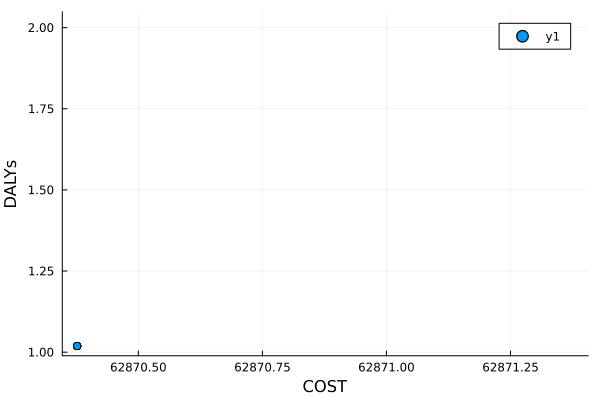

In [21]:
#Now for solving this with 50 sub intervals, and graphing
#setting up upper bound and lower bound epsilon values
#upper bound solution
#For Getting the min solution for environmental impact values of epsilon

#LB is lower bound, UB is upper bound, and h is the  
function SCO_eps(g,l,p,s,i,LB,UB,h)
    
    #Generic sets of variables
    T = 2 #two time periods
    GG = g
    G = size(g,1)  #Grid Zones (23 zones)
    L = length(l)  #transportation technologies (4 types)
    P = length(p)  #Plant technologies (3 types for 2 types)
    S = length(s)  #Storage technologies (2 types)
    I = length(i)  #hydrogen form (2 types)
    
    model = Model(Gurobi.Optimizer)
    #all the given values for demand, and such increase by 5% each time period
     @variables(model, begin
        CPL[g = 1:G, p = 1:P] >= 0                #Capacity of manufacturing technology
        CST[g = 1:G, s = 1:S] >= 0                #Capacity of storage technology s in grid g in period t
        CEPL[g = 1:G, p = 1:P] >= 0               #Capacity expansion of manufacturing technology
        CEST[g = 1:G, s = 1:S] >= 0               #Capacity  expansion of storage technology s in grid g in period t
        D[i = 1:I, g = 1:G] >= 0                  #amount of hydrogen for i distributed in grid g in period t
        DAM >= 0                                  #Damage in human health due to climate change
        FC >= 0                                   #fuel costs
        FCC >= 0                         #Facility capital costs in period t            
        FOC >= 0                         #Facility operacting costs in time t
        GC  >= 0                          #general costs in period t
        LC  >= 0                          #labor costs in period t
        LCI >= 0                                   #Life cycle emmsions of chemcial B
        MC  >= 0                          #maaintenance costs in period t
        NPL[g = 1:G, p = 1:P] >= 0                 #Number of plants type p installed in grid g in time period t
        NST[g = 1:G, s = 1:S] >= 0                       #Number of storage technologies p installed in grid g in time period t
        NTR[l = 1:L] >= 0                          #Number of transportation units type l purchaced in period t
        PR[i = 1:I, g = 1:G, p = 1:P] >= 0          #Production of hydrogen mode i via technology p in period t in grid g
        Q[i = 1:I, g = 1:G, gp = 1:G, p = 1:P] >= 0 #flow of hydrogen mode i via transformation mode l between grids g and g' in period t
        S1[i = 1:I, g = 1:G, s = 1:S] >= 0           #amount of hydrogen in physical form i stored via tech s in grid g in period t
        TC  >= 0                                    #total amount of money spent in period t   
        TCC >= 0                                   #total transportation capitcal cost in period t
        TDC >= 0                                            #total discounted price
        TMC[l = 1:L] >= 0                          #transportation capital cost of mode l in period t
        TOC  >= 0                                   #transportation operating cost in period t
        X[g = 1:G, gp = 1:G, l = 1:L], Bin         #Binary variable for link between g and g' using technology l(1 if there 0 if not)
        ϵ                                         #Epsilon constraint method
           
    end)
    
            
   @constraints(model, begin
           
        #Mass Balance Constraints
        MB1[i = 1:I , g = 1:G],  sum(PR[i,g,p] for p = 1:P) + sum(sum(Q[i,gp,g,l] for l = 1:L) for gp = 1:G if g != gp) == sum(S1[i, g, s] for s = 1:S ) + D[i,g] + sum(sum(Q[i,g,gp,l] for l = 1:L) for gp = 1:G if g != gp)
        MB2[g = 1:G], sum(D[i,g] for i = 1:I) <= d[g]
        MB3[g = 1:G], d[g]*0.25 <= sum(D[i,g] for i = 1:I)
         
            
        #Plant capacity
        PC1[g = 1:G, p = 1:P], sum(PR[i,g,p] for i = 1:I) <= CPL[g,p]
        PC2[g = 1:G, p = 1:P], 0.25*CPL[g,p] <= sum(PR[i,g,p] for i = 1:I)  
        PC3[g = 1:G, p = 1:P], CPL[g,p] == CEPL[g,p] 
        PC4[g = 1:G, p = 1:P], CEPL[g,p] <= 480000*365*NPL[g,p] 
        PC5[g = 1:G, p = 1:P], 10000*365*NPL[g,p] <= CEPL[g,p]
            
        #transportation
        
        TR1[i = 1:I, l =1:L,g = 1:G, gp= 1:G, gp! = g], 181*X[g,gp,l] <= sum(Q[i, g, gp, l] for i in 1:I) 
        TR2[i = 1:I, l =1:L,g = 1:G, gp= 1:G, gp != g], sum(Q[i, g, gp, l] for i in 1:I) <= 365*960000X[g,gp,l] 
       TR3[l =1:L, g = 1:G, gp= 1:G, gp! = g], (X[g,gp,l]) + (X[gp,g,l] ) <= 1

              
        #Storage capacity
        SC1[g = 1:G, s = 1:S], sum(S1[i,g,s] for i in 1:2) <= CST[g,s]
        SC2[i = 1:I ,g = 1:G], 2*((1/365)*D[i,g]) <= sum(CST[g,s] for s in 1:S)
        SC3[g = 1:G, s = 1:S], CST[g,s] == CEST[g,s]
        SC4[g = 1:G, s = 1:S], 10000*365*NST[g,s] <= CEST[g,s] 
        SC5[g = 1:G, s = 1:S], CEST[g,s] <= 540000*365*NST[g,s]
         
        #Costs 
        C1, TDC == TC
        C2, TC == FCC+ TCC + FOC + TOC 
        C3, FCC == sum(sum(αPL[g,p]*NPL[g,p] + βPL[g,p]*CEPL[g,p] for p = 1:P) for g = 1:G )  + sum(sum(αST[g,s]*NST[g,s] + βST[g,s]*CEST[g,s]  for s = 1:S) for g = 1:G) 
        C4, TCC == sum(NTR[l]*cc[l] for l= 1:L)
        C5[l = 1:L], NTR[l] >= sum(sum(sum((Q[i,g,gp,l]/av[l]*tcap[l])*(2*Dist(g,gp,GG)/speed[l] + lutime[l]) for gp= 1:G if gp != g) for g= 1:G) for i=1:I)
        
        C6,  FOC == sum(sum(sum(upc[p]*PR[i,g,p] for p = 1:P)  for g = 1:G) for i = 1:I) + sum(sum(sum(usc[i]*D[i,g]*(1/365)  for s = 1:S) for g = 1:G) for i =1:I)
        C7,  TOC == FC + LC + MC + GC 
        C8,  LC == sum(sum(sum(sum(wage[l]*(Q[i,g,gp,l]/tcap[l])*(2*Dist(g,gp,GG)/speed[l] + lutime[l]) for l = 1:L) for gp = 1:G if gp != g) for g = 1:G) for i = 1:I)
        C9,  MC == sum(sum(sum(sum(cud[l]*(Q[i,g,gp,l]/tcap[l])*(2*Dist(g,gp,GG)) for l = 1:L) for gp = 1:G if gp != g) for g = 1:G) for i = 1:I)
        C10, GC == sum(ge[l]*NTR[l]  for l = 1:L)
        C11, FC == sum(sum(sum(sum(fuelp[l]*(Q[i,g,gp,l]/tcap[l]*tcap[l])*(2*Dist(g,gp,GG)) for l = 1:L) for gp = 1:G if gp != g) for g = 1:G) for i = 1:I)
               
        #LCA 
        #This can be simplified since there is only 1 chemical source
        
        D1, DAM ==  sum(sum(sum(PR[i,g,p]*(ωPR[p] + ωST[i]) for p = 1:P)  for g = 1:G ) for i = 1:I) + sum(sum(sum(sum(Q[i,g,gp,l]*(Dist(g,gp,GG)*ωTR[l]) for l =1:L) for gp = 1:G if g != gp)  for g = 1:G ) for i = 1:I)
        D2, DAM <= ϵ
        D3, LB <= ϵ
        D4, UB >= ϵ
            
        #Others
        O1[g = 1:G, p = 1:P], NPL[g,p] <= 20
        O2[g = 1:G, s = 1:S], NST[g,s] <= 250
        O3[l = 1:L], NTR[l] <= 50

        
            end)
    
    @objective(model, Min, TDC)
    
    optimize!(model)
    return value(TDC),value(DAM)
end

g = L
#l = ["LHTT","LHRTC","CHTT","CHRTC"]
l = rand(4)
#p = ["SMR", "CG", "BG"]
p = rand(6)
#s = ["LS", "GS"]
s = rand(2)
#i = ["Liquid", "Gas"]
i = rand(2)

LB = 1*10^7
UB = 3*10^15
x1 = zeros(10,1)
x2 = zeros(10,1)

index = 1
for h = 1:10
    h = UB - ((UB-LB)/10)*h
    x = SCO_eps(g,l,p,s,i,LB,UB,h)
    x1[index,1] = x[1]
    x2[index,1] = x[2]
    index = index + 1
end

scatter(x1,x2,xlabel = "COST", ylabel ="DALYs")




In [19]:
x1
x2


10×1 Matrix{Float64}:
 1.0187567250000003
 1.0187567250000003
 1.0187567250000003
 1.0187567250000003
 1.0187567250000003
 1.0187567250000003
 1.0187567250000003
 1.0187567250000003
 1.0187567250000003
 1.0187567250000003

In [38]:
#FOr the upper bound and lower bound values based on number of grid points greater tham 5,

index = 1
x1 = zeros(19,1)
x2 = zeros(19,1)
for B = 5:23
    L = zeros(B,2)
    z = 0
    for i = 1:5
        for j = 1:5
            z = z+1
            if (z <= B)
                L[z,1] = i
                L[z,2] = j
            end
        end
    end
    g = L
    x1[index,1] = SCO_upper(g,l,p,s,i)
    x2[index,1] = SCO_lower(g,l,p,s,i)
    index = index +1
end



Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-13
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 783 rows, 630 columns and 3380 nonzeros
Model fingerprint: 0x722327e0
Variable types: 530 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [8e-09, 4e+08]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+03]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 637 rows and 490 columns
Presolve time: 0.00s
Presolved: 146 rows, 140 columns, 470 nonzeros
Variable types: 140 continuous, 0 integer (0 binary)

Root relaxation: objective 8.524336e+14, 5 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | I

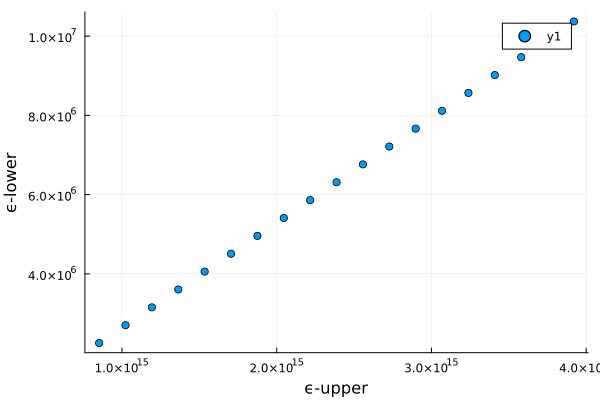

In [37]:
scatter(x1,x2)
 scatter!(xlabel= "ϵ-upper" )
scatter!(ylabel= "ϵ-lower")